In [0]:
# copy preprocessed dataset and unzip
%cp '/content/drive/My Drive/SIMS_Dataset/Dataset_retinaNet.zip' /content/
!unzip Dataset_retinaNet.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/Dataset/train/images/1637.jpg  
  inflating: content/Dataset/train/images/2176.jpg  
  inflating: content/Dataset/train/images/3391.jpg  
  inflating: content/Dataset/train/images/3373.jpg  
  inflating: content/Dataset/train/images/3896.jpg  
  inflating: content/Dataset/train/images/3918.jpg  
  inflating: content/Dataset/train/images/2361.jpg  
  inflating: content/Dataset/train/images/3814.jpg  
  inflating: content/Dataset/train/images/1282.jpg  
  inflating: content/Dataset/train/images/0258.jpg  
  inflating: content/Dataset/train/images/1186.jpg  
  inflating: content/Dataset/train/images/0109.jpg  
  inflating: content/Dataset/labels_valid.csv  
   creating: content/Dataset/test/
   creating: content/Dataset/test/annotations/
  inflating: content/Dataset/test/annotations/4537.xml  
  inflating: content/Dataset/test/annotations/4650.xml  
  inflating: content/Dataset/test/annotations/1382.xml  
  inflating:

In [0]:
!git clone https://github.com/fizyr/keras-retinanet.git
# !pip install numpy --user # already satisfied in colab
%cd keras-retinanet/

# move dataset into keras-retinaNet folder
!mv /content/content/Dataset /content/keras-retinanet/

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 5705, done.
remote: Total 5705 (delta 0), reused 0 (delta 0), pack-reused 5705
Receiving objects: 100% (5705/5705), 13.36 MiB | 14.06 MiB/s, done.
Resolving deltas: 100% (3831/3831), done.
/content/keras-retinanet


In [0]:
!pip install . 

Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170093 sha256=7481f360621a2ea9a08c44699c16724a90509f7d1ca8dadce657ed2833c0abd8
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=4e3884acc020387baa387ab380289bb7eeaecf0c34e372bc1c22d0d66dd47884
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [0]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [0]:
# check validity of annotations with debug.py --no-gui --output-dir debug_output 
!python3 keras_retinanet/bin/debug.py csv labels_train.csv sims_classes.csv  # --output-dir debug_output #--no-resize --anchors --display-name --annotations --no-gui --output-dir debug_output --flatten-output

Using TensorFlow backend.
2020-05-09 05:38:08.038129: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
: cannot connect to X server 


Training

In [0]:
!python3 keras_retinanet/bin/train.py --batch-size 4 --epochs 50 --steps 1000 --tensorboard-dir '/content/drive/My Drive/SIMS_Dataset/baseline/runs/' --snapshot-path '/content/drive/My Drive/SIMS_Dataset/baseline/snapshot' --no-resize --weighted-average --compute-val-loss csv labels_train.csv sims_classes.csv --val-annotations labels_valid.csv

Using TensorFlow backend.
2020-05-09 05:42:53.408741: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
102948864/102945312 [==============================] - 3s 0us/step
Creating model, this may take a second...
2020-05-09 05:42:59.567501: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-09 05:42:59.647145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-09 05:42:59.647783: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-05-09 05:42:59.647829: I tensorflow/stream_executor/platform/defa

**Model conversion for inference and evaluation**

In [0]:
# !mkdir snapshots-inference/
!python3 keras_retinanet/bin/convert_model.py '/content/drive/My Drive/SIMS_Dataset/baseline/snapshot/resnet50_csv_20.h5' snapshots-inference/retinaNet_resnet50_15.h5

Using TensorFlow backend.
2020-05-09 11:42:13.220481: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-09 11:42:14.784346: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-09 11:42:14.804186: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-09 11:42:14.804821: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-05-09 11:42:14.804866: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-05-09 11:42:14.807265: I ten

In [0]:
!python3 keras_retinanet/bin/evaluate.py --save-path test_output csv labels_test.csv sims_classes.csv 'snapshots-inference/retinaNet_resnet50.h5'

Using TensorFlow backend.
2020-05-09 10:52:58.652735: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Loading model, this may take a second...
2020-05-09 10:53:01.729008: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-05-09 10:53:01.747241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-05-09 10:53:01.747806: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-05-09 10:53:01.747848: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.

In [0]:
import keras

import sys
sys.path.insert(0, '../')

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

In [0]:
model_path = '/content/keras-retinanet/snapshots-inference/retinaNet_resnet50_15.h5'

# load retinanet model
my_model = models.load_model(model_path, backbone_name='resnet50')

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
labels_to_names = {0: 'car', 1: 'truck', 2: 'van', 3: 'longvehicle', 4: 'bus', 5: 'airliner', 6: 'propeller',
                   7: 'trainer', 8: 'chartered', 9: 'fighter', 10: 'other', 11: 'stairtruck',
                   12: 'pushbacktruck', 13: 'helicopter', 14: 'boat'}

In [0]:
def detector(im_path):
  image = read_image_bgr(im_path)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = my_model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < 0.5:
          break
          
      color = label_color(label)
      
      b = box.astype(int)
      draw_box(draw, b, color=color)
      
      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)
      
  plt.figure(figsize=(15, 15))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

processing time:  3.688668727874756


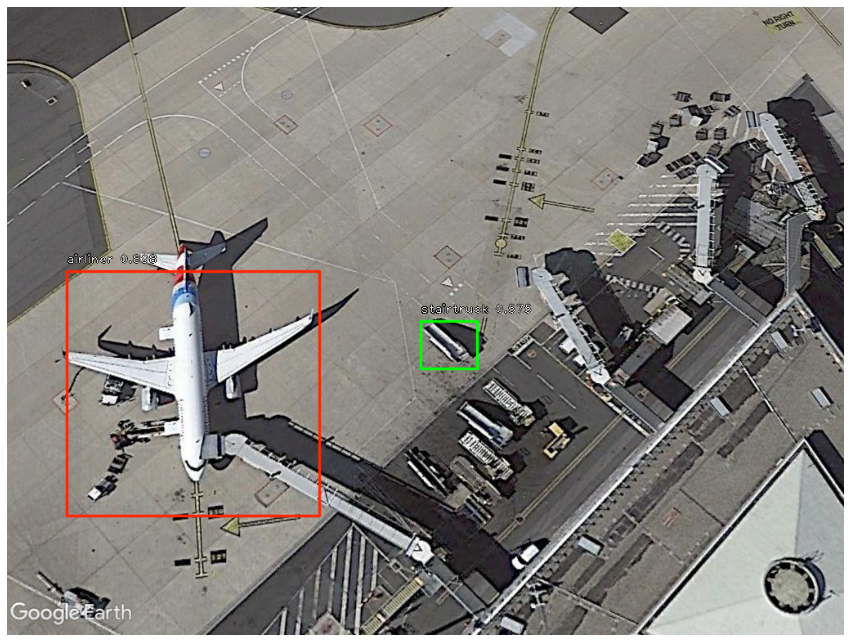

In [0]:
detector('/content/keras-retinanet/Dataset/test/images/0015.jpg')

processing time:  0.07462358474731445


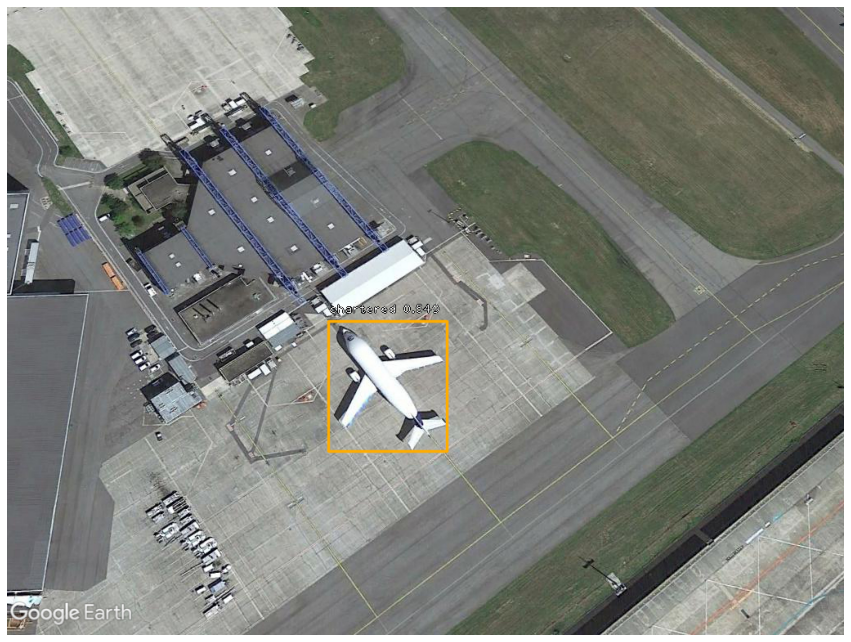

In [0]:
detector('/content/keras-retinanet/Dataset/test/images/0023.jpg')

processing time:  0.07433509826660156


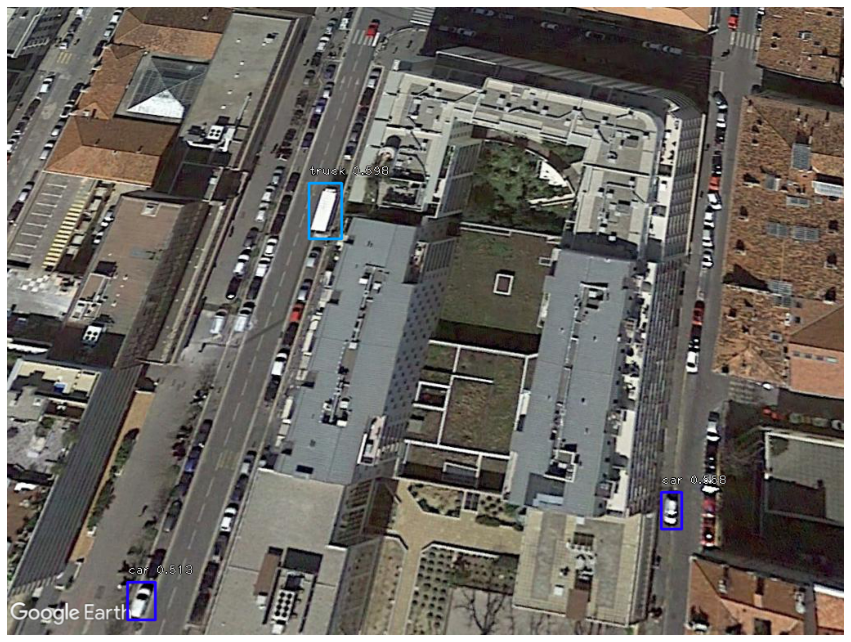

In [0]:
detector('/content/keras-retinanet/Dataset/test/images/0045.jpg')

processing time:  0.07528996467590332


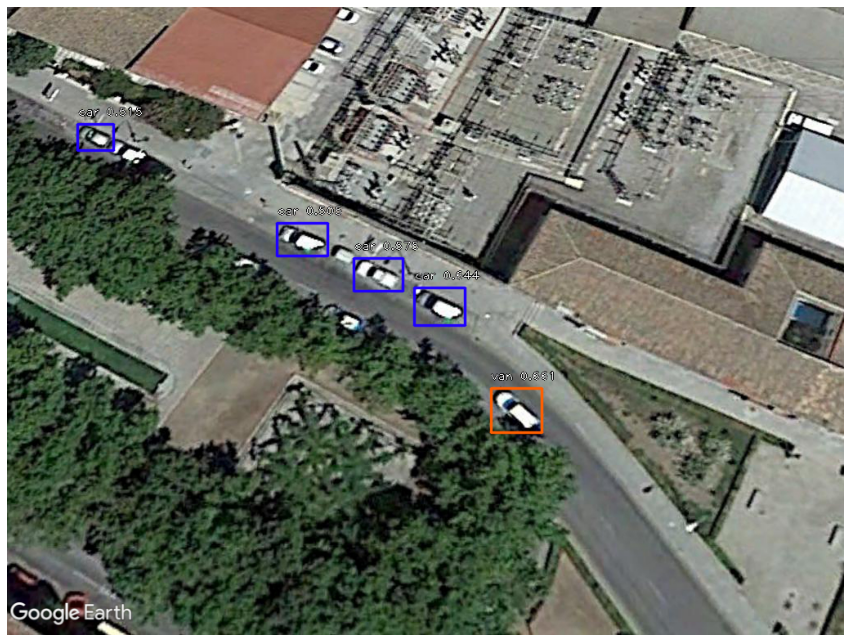

In [0]:
detector('/content/keras-retinanet/Dataset/test/images/0415.jpg')

processing time:  0.07774138450622559


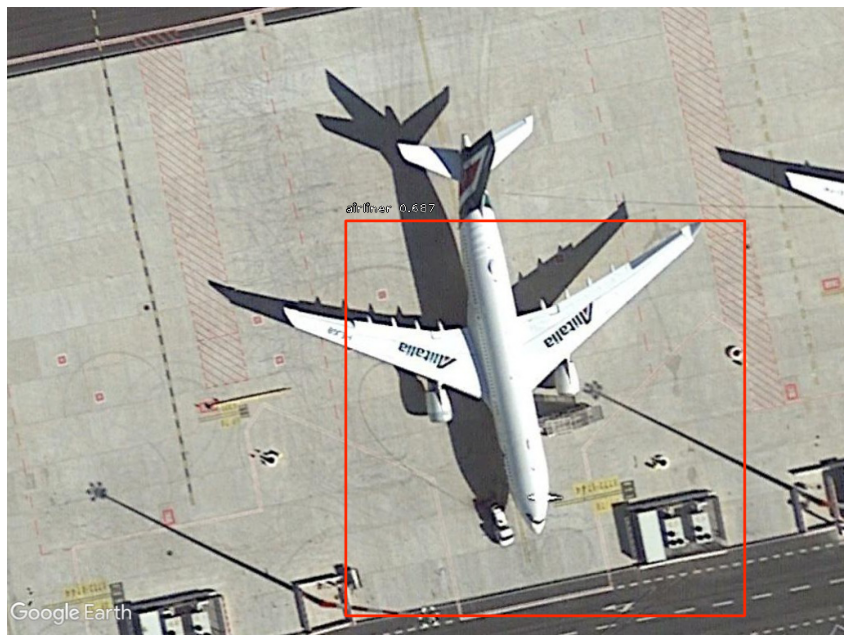

In [0]:
detector('/content/keras-retinanet/Dataset/test/images/0538.jpg')

processing time:  0.07591366767883301


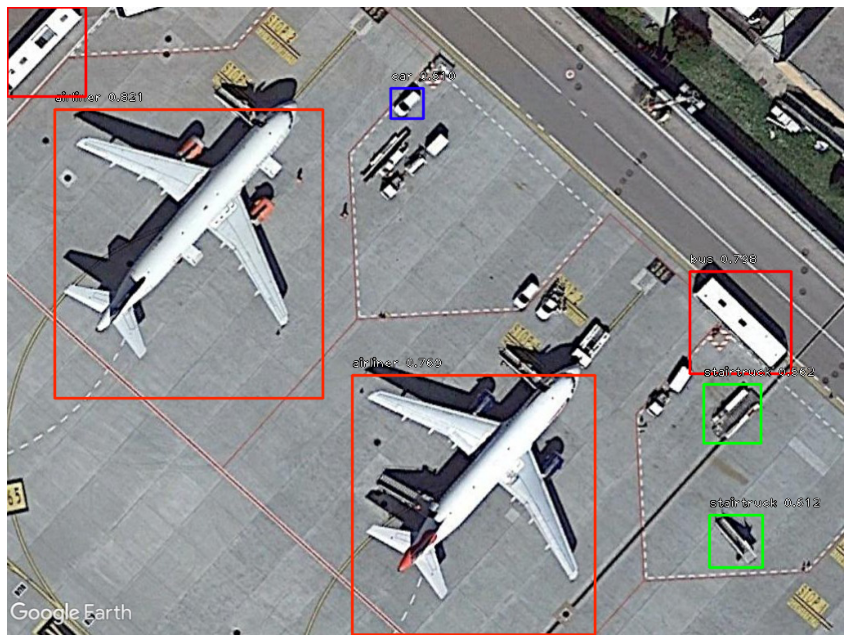

In [0]:
detector('/content/keras-retinanet/Dataset/test/images/1077.jpg')